In [23]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [24]:
sales_df = pd.read_csv('ev_sales_by_makers_and_cat_15-24.csv')
place_df = pd.read_csv('EV Maker by Place.csv')

In [25]:
# Show the first few rows and basic info of each to understand structure
sales_preview = sales_df.head()
sales_info = sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cat     1386 non-null   object
 1   Maker   1386 non-null   object
 2   2015    1386 non-null   int64 
 3   2016    1386 non-null   int64 
 4   2017    1386 non-null   int64 
 5   2018    1386 non-null   int64 
 6   2019    1386 non-null   int64 
 7   2020    1386 non-null   int64 
 8   2021    1386 non-null   int64 
 9   2022    1386 non-null   int64 
 10  2023    1386 non-null   int64 
 11  2024    1386 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 130.1+ KB


In [26]:
place_preview = place_df.head()
place_info = place_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [27]:
(sales_preview, place_preview)

(  Cat                          Maker  2015  2016  2017  2018  2019  2020  \
 0  3W    "VOLVO GROUP INDIA PVT LTD"     0     0    31    12     0     0   
 1  3W         3EV INDUSTRIES PVT LTD     0     0     0     0     0     0   
 2  2W         3GB TECHNOLOGY PVT LTD     0     0     0     1     0     0   
 3  3W         3GB TECHNOLOGY PVT LTD     0     1     1     0     0     0   
 4  3W  3S INDUSTRIES PRIVATE LIMITED     0     0     0     0    48    66   
 
    2021  2022  2023  2024  
 0     0     0     0     0  
 1   112   390   545    51  
 2     0     0     0     0  
 3     0     0     0     0  
 4    43    68   266   578  ,
             EV Maker        Place        State
 0        Tata Motors         Pune  Maharashtra
 1  Mahindra Electric    Bengaluru    Karnataka
 2       Ather Energy    Bengaluru    Karnataka
 3      Hero Electric    New Delhi        Delhi
 4       Ola Electric  Krishnagiri   Tamil Nadu)

In [28]:
# Calculate total, mean, std, and growth
sales_df['Total_Sales'] = sales_df.loc[:, '2015':'2024'].sum(axis=1)
sales_df['Mean_Sales'] = sales_df.loc[:, '2015':'2024'].mean(axis=1)
sales_df['Std_Sales'] = sales_df.loc[:, '2015':'2024'].std(axis=1)
sales_df['Growth'] = sales_df['2024'] - sales_df['2015']

In [29]:
# Drop duplicate maker-category combinations, keeping the latest entry if needed
sales_summary = sales_df.groupby(['Maker', 'Cat'], as_index=False).agg({
    'Total_Sales': 'sum',
    'Mean_Sales': 'mean',
    'Std_Sales': 'mean',
    'Growth': 'sum'
})

In [30]:
# Preview the processed data
sales_summary.head()

,Maker,Cat,Total_Sales,Mean_Sales,Std_Sales,Growth
0,"""VOLVO GROUP INDIA PVT LTD""",3W,43,4.3,10.111050,0
1,3EV INDUSTRIES PVT LTD,3W,1098,109.8,195.422505,51
2,3GB TECHNOLOGY PVT LTD,2W,1,0.1,0.316228,0
3,3GB TECHNOLOGY PVT LTD,3W,2,0.2,0.421637,0
4,3S INDUSTRIES PRIVATE LIMITED,3W,1069,106.9,183.695672,578


In [31]:
# Assuming `sales_summary` is your processed DataFrame
features = ['Total_Sales', 'Mean_Sales', 'Std_Sales', 'Growth']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_summary[features])

In [32]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

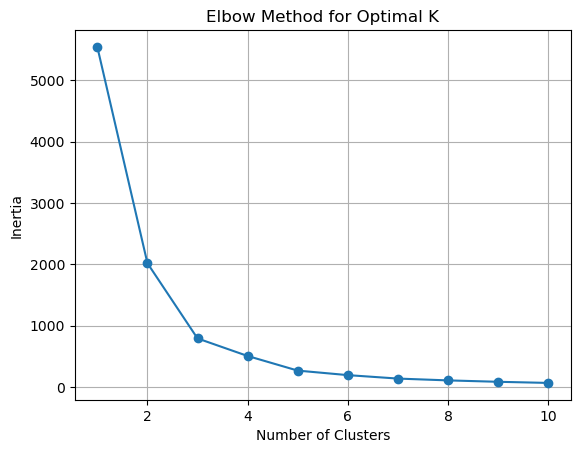

In [33]:
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [34]:
# Recalculate metrics
sales_df['Total_Sales'] = sales_df.loc[:, '2015':'2024'].sum(axis=1)
sales_df['Mean_Sales'] = sales_df.loc[:, '2015':'2024'].mean(axis=1)
sales_df['Std_Sales'] = sales_df.loc[:, '2015':'2024'].std(axis=1)
sales_df['Growth'] = sales_df['2024'] - sales_df['2015']

In [35]:
# Aggregate metrics by Maker and Category
sales_summary = sales_df.groupby(['Maker', 'Cat'], as_index=False).agg({
    'Total_Sales': 'sum',
    'Mean_Sales': 'mean',
    'Std_Sales': 'mean',
    'Growth': 'sum'
})

In [36]:
# Normalize selected features
features = ['Total_Sales', 'Mean_Sales', 'Std_Sales', 'Growth']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_summary[features])

In [37]:
# KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
sales_summary['Cluster'] = kmeans.fit_predict(scaled_data)

In [38]:
# Analyze cluster distribution and profile
cluster_counts = sales_summary['Cluster'].value_counts().sort_index()
cluster_profiles = sales_summary.groupby('Cluster')[features].mean()

In [39]:
cluster_counts, cluster_profiles

(Cluster
 0    1378
 1       1
 2       7
 Name: count, dtype: int64,
            Total_Sales    Mean_Sales      Std_Sales         Growth
 Cluster                                                           
 0          1747.694485    174.769448     250.087875     361.851959
 1        588266.000000  58826.600000  101913.507927  211273.000000
 2        203473.428571  20347.342857   32281.811554   37326.571429)

In [40]:
#2nd Dataset Segmentaation
place_df.head()

,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


In [41]:
state_counts = place_df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'EV_Maker_Count']

In [42]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(state_counts[['EV_Maker_Count']])

In [43]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
state_counts['Cluster'] = kmeans.fit_predict(scaled_data)

c:\Users\dipta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
# Count how many states fall into each cluster
print(state_counts['Cluster'].value_counts())

# View cluster profiles
print(state_counts.groupby('Cluster')['EV_Maker_Count'].mean())

Cluster
0    6
2    5
1    2
Name: count, dtype: int64
Cluster
0     1.833333
1    13.000000
2     5.000000
Name: EV_Maker_Count, dtype: float64


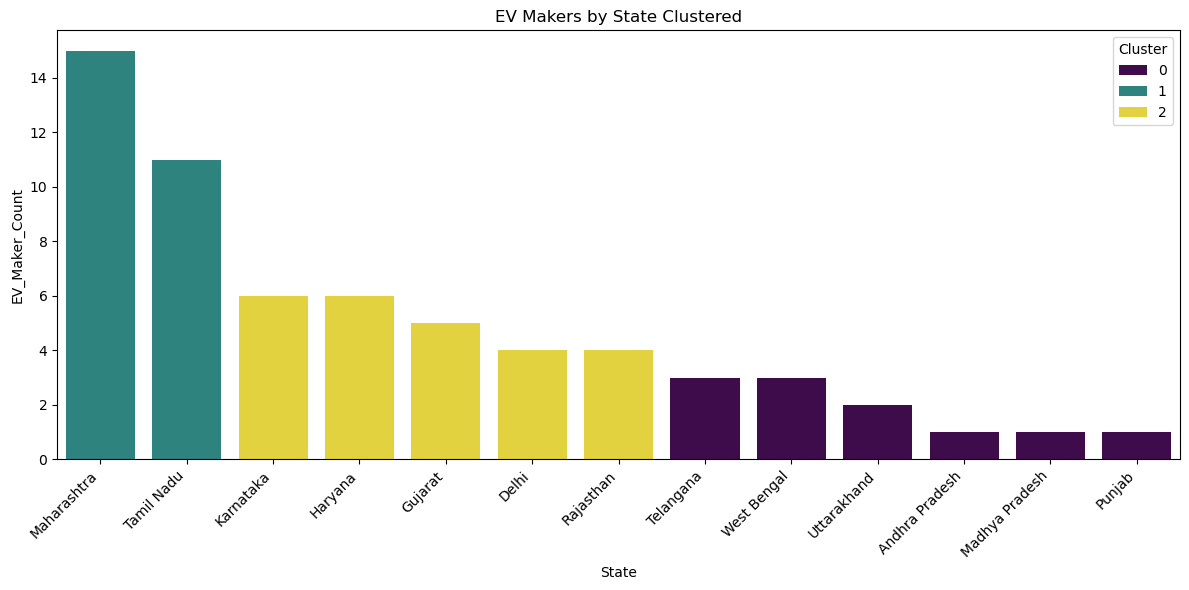

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(data=state_counts.sort_values(by='EV_Maker_Count', ascending=False),
            x='State', y='EV_Maker_Count', hue='Cluster', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('EV Makers by State Clustered')
plt.tight_layout()
plt.show()